# Data Science

## Business Understanding
Indonesia adalah negara yang memiliki banyak pulau dengan total luas wilayarnya sebesar 1.9 juta kilo meter persegi. Besarnya wilayah negara Indonesia mempengaruhi tingkat populasi, dimana Indonesia memiliki 275.361.267 jiwa per 30 Juni 2022. Dengan besarnya populasi tersebut, banyak sekali yang terkena dampak positif, maupun negatif. Salah satu yang terkena dampaknya adalah tingkat kemacetan lalu lintas.

Pada tahun 2021, DKI Jakarta menduduki peringkat 46 dari 404 kota yang diukur dari 6 benua. Pada tahun 2022, puncak kemacetan di DKI Jakarta berada pada jam 06.30-10.00 WIB dan 15.30-20.30 WIB. Jumlah penduduk yang beraktivitas kebanyakan dari penduduk asli Jakarta sebesar 10,7 juta dan ditambah penduduk dari Bogor, depok, Tangerang, dan Bekasi sekitar 3,3 juta yang menyebabkan kemacetan ini.

Waze adalah sebuah aplikasi navigasi yang dapat membantu pengguna dalam merencanakan perjalanan. Dalam proyek kali ini, akan digunakan dataset yang disediakan oleh Waze untuk mengetahui tingkat kemacetan dibeberapa daerah, seperti Bandung, Bekasi, Depok, Bogor, dan Tasikmalaya.

## Data Understanding

Berikut adalah dataset yang digunakan beserta dengan penjelasan setiap kolomnya.
1. aggregate_median_jams_Kota Bogor
  - time: Time (every hour)
  - kemendagri_kabupaten_kode:	Kemendagri code of cities
  - kemendagri_kabupaten_nama:	Kemendagri name of cities
  - street:	Street name
  - level:	Traffic congestion level (median)
  - median_length:	Jam length in meters (median)
  - median_delay:	Delay of jam (in seconds) compared to free flow speed (in - case of block, -1) (median)
  - median_speed_km:	Current median speed on jammed segments in km/h
  - total_records:	Total data recorded in a given time
  - id:	Row ID
  - date:	Date
  - geometry:	Geometry data type (spatial data)


## Overview

In [11]:
!pip install dataprep
!pip install odfpy
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd
import numpy as np
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [13]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [14]:
%cd /content/drive/MyDrive/DSLS2023/DataScience/Dataset

/content/drive/MyDrive/DSLS2023/DataScience/Dataset


In [15]:
median_jams_Bogor = pd.read_csv("aggregate_median_jams_Kota Bogor.csv")

### Median Jams

In [16]:
median_jams_Bogor.head()

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Pahlawan,2,784.0,62.0,20.310001,4,33469021,2022-07-06,2.0,"MULTILINESTRING ((106.797269 -6.608899, 106.79..."
1,1,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,2,33469023,2022-07-06,2.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
2,2,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,61,33469019,2022-07-06,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."
3,3,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,10,33469020,2022-07-06,3.0,"MULTILINESTRING ((106.845486 -6.6594, 106.8454..."
4,4,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,1,2438.0,87.0,42.270000,2,33469022,2022-07-06,1.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."


In [17]:
create_report(median_jams_Bogor).show()

Output hidden; open in https://colab.research.google.com to view.

Diatas merupakan visualisasi dasar tentang dataframe median_jam_bogor sebagai gambaran besar mengenai data.

## Data Cleansing and Preprocessing

In [48]:
df = median_jams_Bogor.copy()
df.head()

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Pahlawan,2,784.0,62.0,20.310001,4,33469021,2022-07-06,2.0,"MULTILINESTRING ((106.797269 -6.608899, 106.79..."
1,1,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,2,33469023,2022-07-06,2.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
2,2,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,61,33469019,2022-07-06,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."
3,3,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,10,33469020,2022-07-06,3.0,"MULTILINESTRING ((106.845486 -6.6594, 106.8454..."
4,4,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,1,2438.0,87.0,42.270000,2,33469022,2022-07-06,1.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."


In [49]:
df = df.drop(columns=['Unnamed: 0', 'id', 'kemendagri_kabupaten_kode', 'geometry', 'time', 'date', 'kemendagri_kabupaten_nama'])
df = df.dropna()
df.head()

,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level
0,Pahlawan,2,784.0,62.0,20.310001,4,2.0
1,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,2,2.0
2,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,61,5.0
3,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,10,3.0
4,Tol Lingkar Luar Bogor,1,2438.0,87.0,42.270000,2,1.0


In [50]:
pd.DataFrame({'Features': df.columns,
              'dataType': df.dtypes.values,
              'nullvalues': [df[i].isna().sum() for i in df.columns],
              'unique': [df[i].nunique() for i in df.columns],
              'uniqueSample': [list(pd.Series(df[i].unique()))
                               for i in df.columns]}).reset_index(drop=True)

,Features,dataType,nullvalues,unique,uniqueSample
0,street,object,0,454,"[Pahlawan, Tol Lingkar Luar Bogor, KH Soleh Is..."
1,level,int64,0,5,"[2, 5, 3, 1, 4]"
2,median_length,float64,0,3829,"[784.0, 1314.0, 167.0, 379.0, 2438.0, 808.0, 2..."
3,median_delay,float64,0,1640,"[62.0, 63.0, -1.0, 117.5, 87.0, 73.0, 128.5, 9..."
4,median_speed_kmh,float64,0,9384,"[20.310001, 37.71, 0.0, 8.594999, 42.27, 19.92..."
5,total_records,int64,0,197,"[4, 2, 61, 10, 60, 1, 6, 11, 7, 8, 9, 5, 12, 1..."
6,median_level,float64,0,5,"[2.0, 5.0, 3.0, 1.0, 4.0]"


In [53]:
street = df.street.unique()

In [60]:
temp = df[df['street'] == "Pahlawan"].reset_index().drop(columns=['index'])
temp

,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level
0,Pahlawan,2,784.0,62.0,20.310001,4,2.0
1,Pahlawan,2,841.0,74.5,17.915000,2,2.0
2,Pahlawan,2,770.0,64.0,18.700000,27,2.0
3,Pahlawan,2,723.0,67.0,18.600000,29,2.0
4,Pahlawan,3,920.0,93.0,17.880000,5,3.0
...,...,...,...,...,...,...,...
2012,Pahlawan,1,1434.5,86.5,22.340000,4,1.0
2013,Pahlawan,2,1174.0,138.0,16.760000,16,2.0
2014,Pahlawan,3,495.0,150.0,8.595000,4,3.0
2015,Pahlawan,1,1740.0,60.0,25.020000,2,1.0


In [62]:
pd.DataFrame({'Features': temp.columns,
              'dataType': temp.dtypes.values,
              'nullvalues': [temp[i].isna().sum() for i in temp.columns],
              'unique': [temp[i].nunique() for i in temp.columns],
              'uniqueSample': [list(pd.Series(temp[i].unique()))
                               for i in temp.columns]}).reset_index(drop=True)

,Features,dataType,nullvalues,unique,uniqueSample
0,street,object,0,1,[Pahlawan]
1,level,int64,0,5,"[2, 3, 1, 4, 5]"
2,median_length,float64,0,356,"[784.0, 841.0, 770.0, 723.0, 920.0, 862.0, 672..."
3,median_delay,float64,0,459,"[62.0, 74.5, 64.0, 67.0, 93.0, 71.0, 68.0, 66...."
4,median_speed_kmh,float64,0,1467,"[20.310001, 17.915, 18.7, 18.6, 17.88, 19.33, ..."
5,total_records,int64,0,97,"[4, 2, 27, 29, 5, 23, 12, 35, 3, 6, 52, 40, 31..."
6,median_level,float64,0,5,"[2.0, 3.0, 1.0, 4.0, 5.0]"


In [64]:
df_new = pd.DataFrame(columns=['street', 'level', 'median_length', 'median_delay', 'median_speed_kmh', 'total_records', 'median_level'])
df_new

,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level


In [73]:
for i in street:
  temp = df[df['street'] == i].reset_index().drop(columns=['index'])
  total = temp.sum()
  
  df_new = df_new.append({'street': i,
                          'level': round(total[1]/len(temp)),
                          'median_length': round(total[2]/len(temp)),
                          'median_delay': round(total[3]/len(temp)),
                          'median_speed_kmh': round(total[4]/len(temp)),
                          'total_records': round(total[5]/len(temp)),
                          'median_level': round(total[6]/len(temp))}, ignore_index=True)

In [74]:
df_new

,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level
0,Pahlawan,3,868,136,15,21,3
1,Tol Lingkar Luar Bogor,2,2189,121,36,8,2
2,KH Soleh Iskandar (Jalur Lambat),4,260,32,3,47,4
3,N8 Jalan Raya Sukabumi,2,752,107,14,10,2
4,N9 Jalan Raya Pajajaran,2,1237,132,19,39,2
...,...,...,...,...,...,...,...
449,Medika,3,430,105,11,9,3
450,Jalan Parakan Jaya,2,661,96,8,8,2
451,Al-Hasanah,4,205,119,5,9,4
452,Taman Kenari,2,196,103,4,6,2


In [94]:
x = np.asarray(df_new[["median_length", "median_delay"]])

## Modeling & Hyperparameter Tuning

In [115]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

### K-Means

Ini adalah algoritme pembelajaran mesin tanpa pengawasan yang digunakan untuk membagi data input menjadi berbagai kelompok yang telah ditentukan sebelumnya.

K adalah angka yang mendefinisikan cluster atau kelompok yang perlu diperhatikan dalam pengelompokan data. K adalah hyperparameter dan merupakan nilai yang ditentukan pengguna yang tidak dapat dihitung oleh algoritma ini sendiri.

Tujuan utama saat mengimplementasikan k-means melibatkan pendefinisian k cluster sedemikian rupa sehingga total variasi dalam cluster (atau kesalahan) diminimalkan. Pusat cluster adalah rata-rata aritmatika dari semua titik data yang termasuk dalam cluster tersebut.

Ini adalah contoh praktis dari pengelompokan, Jenis kasus ini menggunakan teknik pengelompokan seperti sarana K untuk mengelompokkan pengguna yang memiliki minat yang sama.

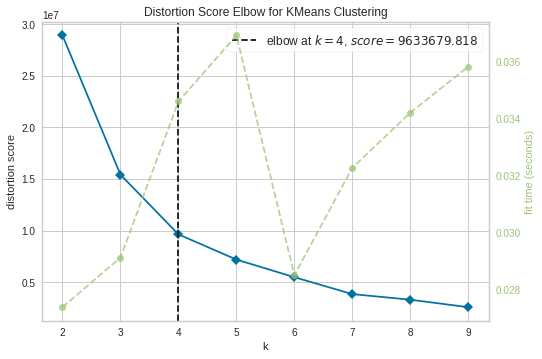

In [123]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(x)
visualizer.show()
plt.show()

In [125]:
model_km = KMeans(n_clusters=4, random_state=1)
model_km.fit(x)

KMeans(n_clusters=4, random_state=1)

In [126]:
df_new['cluster_km'] = model_km.predict(x)
df_new.head()

,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,cluster_km
0,Pahlawan,3,868,136,15,21,3,2
1,Tol Lingkar Luar Bogor,2,2189,121,36,8,2,1
2,KH Soleh Iskandar (Jalur Lambat),4,260,32,3,47,4,0
3,N8 Jalan Raya Sukabumi,2,752,107,14,10,2,2
4,N9 Jalan Raya Pajajaran,2,1237,132,19,39,2,1


In [127]:
df_new['cluster_km'].value_counts()

0    296
2    129
1     28
3      1
Name: cluster_km, dtype: int64

List diatas menunjukan banyaknya jumlah jalan yang telah di clustering

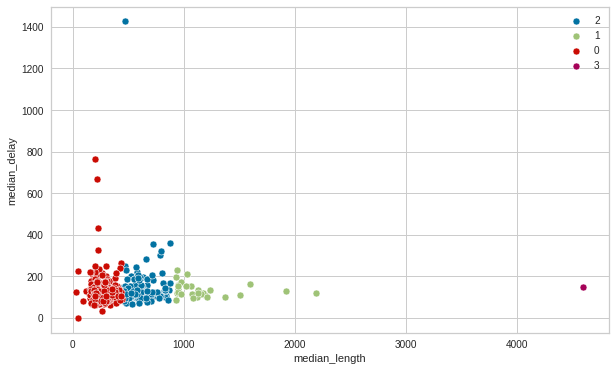

In [129]:
plt.figure(figsize=(10, 6))
for i in df_new['cluster_km'].unique():
    sns.scatterplot(df_new['median_length'][df_new['cluster_km'] == i], df_new['median_delay'][df_new['cluster_km'] == i], label=i)
plt.legend()
plt.show()

### Hierarchial

Algoritma pengelompokan hierarkis mengelompokkan objek serupa ke dalam kelompok yang disebut cluster. Ada dua jenis algoritma pengelompokan hierarkis:

- Agglomerative - Pendekatan dari bawah ke atas. Mulailah dengan banyak klaster kecil dan gabungkan mereka untuk membuat klaster yang lebih besar.

- Divisive - Pendekatan dari atas ke bawah. Mulailah dengan satu klaster kemudian pecahkan menjadi klaster yang lebih kecil.

Beberapa pro dan kontra dari Hierarchical Clustering:

Pro
- Tidak ada asumsi jumlah kluster tertentu (yaitu k-means)
- Mungkin sesuai dengan taksonomi yang bermakna

Kontra
- Setelah keputusan dibuat untuk menggabungkan dua kluster, itu tidak dapat diurungkan
- Terlalu lambat untuk kumpulan data besar, O(𝑛2 log(𝑛))

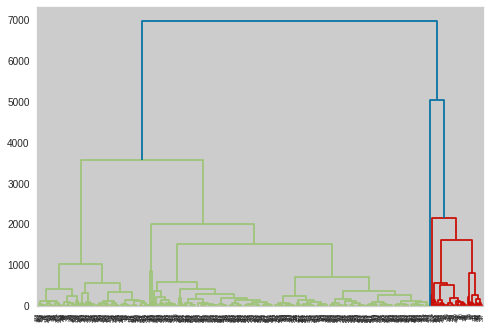

In [130]:
den1 = sch.dendrogram(sch.linkage(x, method='ward', metric='euclidean'))

In [131]:
model_ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model_ag.fit(x)

AgglomerativeClustering(n_clusters=3)

### Evaluation

In [133]:
km_labels = davies_bouldin_score(x, model_km.labels_)
ag_labels = davies_bouldin_score(x, model_ag.labels_)

print(f'DB Score Kmeans: {km_labels}')
print(f'DB Score Agglom: {ag_labels}')

DB Score Kmeans: 0.47663732434252437
DB Score Agglom: 0.3752465706190716


Pada kedua model tersebut mendapatkan score yang mengarah ke nilai 1, sehingga dapat dikatakan bahwa model yang telah dibangun memiliki kapabilitas yang baik. Jika dibandingkan, maka model K-Means memiliki score yang lebih tinggi dari pada Hierarchical.

In [135]:
df_new.to_csv('clustered.csv')

## Referensi
https://www.kompas.com/global/read/2022/11/01/170000370/berapa-luas-negara-indonesia-?page=all

https://dukcapil.kemendagri.go.id/berita/baca/1396/dukcapil-kemendagri-rilis-data-penduduk-semester-i-tahun-2022-naik-054-dalam-waktu-6-bulan

https://jakartamrt.co.id/id/info-terkini/turun-ke-peringkat-46-dunia-indeks-kemacetan-jakarta-semakin-baik

https://www.cnbcindonesia.com/news/20220812004137-4-363140/ngerasa-gak-sih-kalau-jakarta-makin-macet-ini-penyebabnya

https://medium.com/analytics-vidhya/practical-implementation-of-k-means-hierarchical-and-dbscan-clustering-on-dataset-with-bd7f3d13ef7f